# Supervised Learning

- classification : predict one that in advance defined or possible several class labels
  -  binary
  - multiclass
 
 
 
- regression : predict float 

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn # call data or draw easily library
from scipy import sparse

In [2]:
%matplotlib inline


## 2.2

generalization, overfitting, underfitting

## 2.3 Supervised Learning Algorithm

[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape:(26, 2)


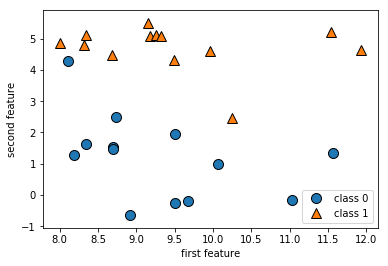

In [3]:
# Exmaple

## Draw dataset
X, y = mglearn.datasets.make_forge()
print(X, y)
## Draw scatterplot
mglearn.discrete_scatter(X[:, 0], X[:,1], y)

"""
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
"""

plt.legend(['class 0', 'class 1'], loc = 4)
plt.xlabel('first feature')
plt.ylabel('second feature')

print("X.shape:{}".format(X.shape))

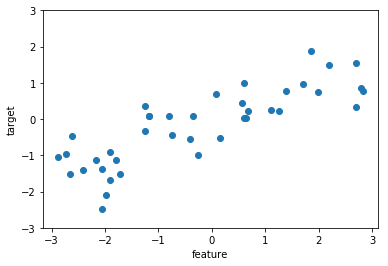

In [4]:
# wave dataset 

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

The "low-d' intution may be not maintained in "high-d". But just know and first time you learned about algorithm, then use low dimension dataset.

In [5]:
## So we begin to analyse Wisconsin Breast Cancer dataset! 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['target', 'target_names', 'data', 'DESCR', 'feature_names'])


In [6]:
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [7]:
print("number of sample by class: {}".format({
    n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
}))

number of sample by class: {'malignant': 212, 'benign': 357}


In [8]:
print("feature name : \n{}".format(cancer.feature_names))

feature name : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
## other one : boston housing dataset -> related to "Feature engineering"

from sklearn.datasets import load_boston
boston = load_boston()
print("shape of data : {}".format(boston.data.shape))

shape of data : (506, 13)


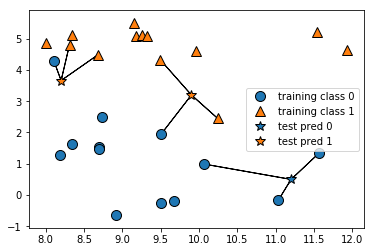

In [10]:
## KNN

mglearn.plots.plot_knn_classification(n_neighbors=3) 

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("prediction of testset: {}".format(clf.predict(X_test)))
print("accurate of testset: {:.2f}%".format(clf.score(X_test, y_test)))

prediction of testset: [1 0 1 0 1 0 0]
accurate of testset: 0.86%


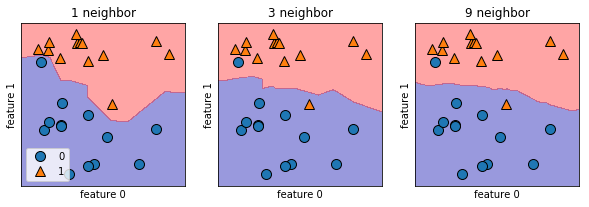

In [12]:
## see the boundary in KNeighborsClassifier

fig, axes = plt.subplots(1,3, figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors= n_neighbors).fit(X,y) # fit method return to 'self'
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

KNN:

https://ko.wikipedia.org/wiki/K-%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

[0.90209790209790208, 0.88811188811188813, 0.92307692307692313, 0.92307692307692313, 0.92307692307692313, 0.93706293706293708, 0.93006993006993011, 0.93006993006993011, 0.91608391608391604, 0.91608391608391604]


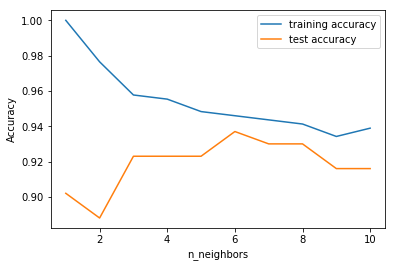

In [13]:
## then apply to cancer dataset

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1~10 apply n_neightbors

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # make a model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # save the accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(test_accuracy)

overfitting, underfitting(difference of n neighbors)

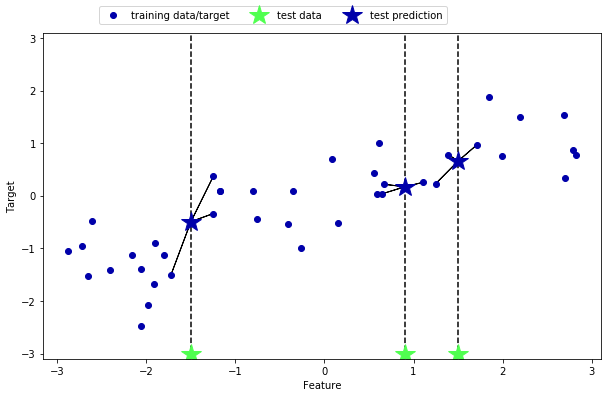

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

### KNeighborsRegressor analysis

In [15]:
## for wave dataset

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("predict for testsets:\n{}".format(reg.predict(X_test)))
print("R^2 for testset : {:.2f}".format(reg.score(X_test, y_test)))

predict for testsets:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 for testset : 0.83


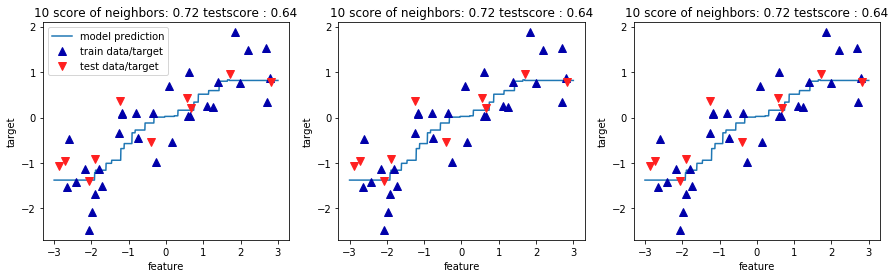

In [16]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
    "{} score of neighbors: {:.2f} testscore : {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "train data/target", 'test data/target'], loc = "best")

- 일반적으로 이웃의 수(매개변수)는 3-5개에서 잘 작동함. 연구자가 고민하여 설정할 것
  - 유클리디안 거리 계산방식
  
  
- 이해하기 매우 쉽고, 비교적 좋은 성능을 발휘, 빠르게 만들 수 있음
- 그러나 훈련세트가 커질 시 느려지고, 특성이 많을 시 작동이 잘 안됨.

## Linear model

w[0]: 0.393906  b: -0.031804


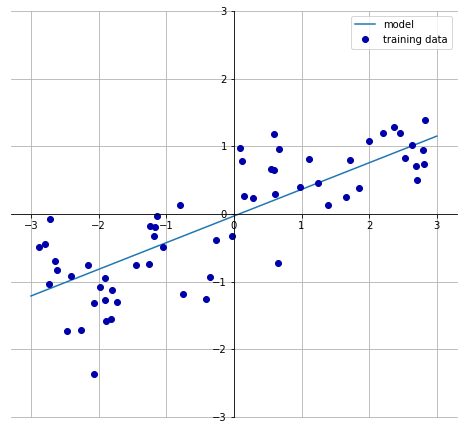

In [17]:
# linear model prediction in wave dataset 

mglearn.plots.plot_linear_regression_wave()

### more dimensinonal -> be hyperplane

In [18]:
### OLS !

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("trainset score : {:.2f}".format(lr.score(X_train, y_train)))
print("testset score : {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_ : [ 0.39390555]
lr.intercept_: -0.031804343026759746
trainset score : 0.67
testset score : 0.66


score is similar ! It means, underfitting.

In [19]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("trainset score : {:.2f}".format(lr.score(X_train, y_train)))
print("testset score : {:.2f}".format(lr.score(X_test, y_test)))

trainset score : 0.95
testset score : 0.61


## Ridge reg.

- 평균제곱오차에 항을 추가. 알파를 크게하면 패널티의 효과가 커지고(가중치 감소), 알파를 작게하면 그 반대가 됨.
- 정확도는 낮아질 수 있지만, 일반화할 수 있음.


In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("trainset score: {:.2f}".format(ridge.score(X_train, y_train)))
print("testset score: {:.2f}".format(ridge.score(X_test, y_test)))

trainset score: 0.89
testset score: 0.75


In [21]:
## decrease/increase alpha

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("trainset score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("testset score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("trainset score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("testset score: {:.2f}".format(ridge01.score(X_test, y_test)))

trainset score: 0.79
testset score: 0.64
trainset score: 0.93
testset score: 0.77


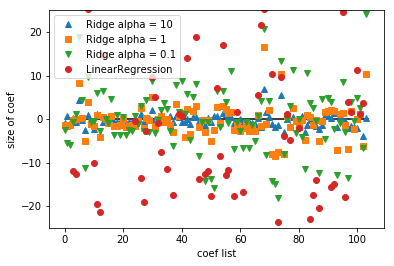

In [22]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("coef list")
plt.ylabel("size of coef")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

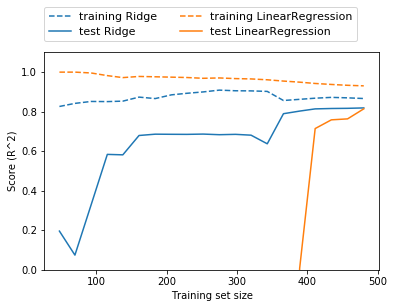

In [23]:
mglearn.plots.plot_ridge_n_samples()

## Lasso Reg.

- L1규제라고 함. 엘라스틱넷에서 L1, L2 규제를 같이 쓰는 반면 라쏘는 L1만
- 벡터의 L1의 노름이 페널티 -> 계수의 절댓값의 합
- 어떠한 계수는 0이 됨. -> 모델에서 제외되는 특성이 생길 수 있음. 모델에 대한 이해도 상승, 중요한 특성 파악 가능

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("trainset score: {:.2f}".format(lasso.score(X_train, y_train)))
print("testset score: {:.2f}".format(lasso.score(X_test, y_test)))
print("used feature number: {}".format(np.sum(lasso.coef_!= 0)))

trainset score: 0.29
testset score: 0.21
used feature number: 4


In [25]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("trainset score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("testset score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("used feature number: {}".format(np.sum(lasso001.coef_!= 0)))

trainset score: 0.90
testset score: 0.77
used feature number: 33


In [26]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("trainset score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("testset score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("used feature number: {}".format(np.sum(lasso00001.coef_!= 0)))

trainset score: 0.95
testset score: 0.64
used feature number: 94


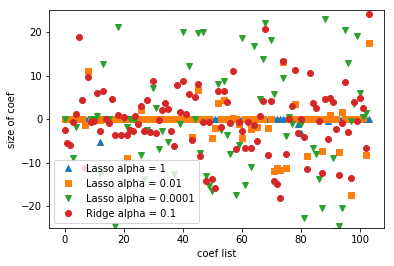

In [27]:
plt.plot(lasso.coef_, '^', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, 's', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.xlabel("coef list")
plt.ylabel("size of coef")
plt.ylim(-25, 25)
plt.legend()

### Linear Reg for classfication

- ex) logistic reg. SVM

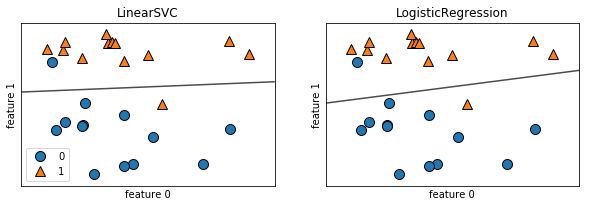

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

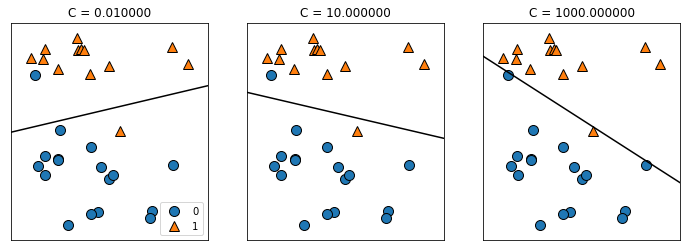

In [29]:
mglearn.plots.plot_linear_svc_regularization()

SVM : C값의 크기에 따라 규제 정도가 다름
규제가 강할수록 수평적인 모습을 보인다. 오른쪽은 과대적합, 왼쪽은 과소적합.

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, stratify = cancer.target,
                                                   random_state=42)

## logreg(default C=1) : 과소적합
logreg = LogisticRegression().fit(X_train, y_train)
print("Score of training set : {:.3f}".format(logreg.score(X_train, y_train)))
print("Score of test set : {:.3f}".format(logreg.score(X_test, y_test)))

## logreg(C=100) : 정확도가 높아짐
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Score of training set(c=100) : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Score of test set(c=100) : {:.3f}".format(logreg100.score(X_test, y_test)))


## logreg(C=0.01)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Score of training set(c=0.01) : {:.3f}".format(logreg001.score(X_train, y_train)))
print("Score of test set(c=0.01) : {:.3f}".format(logreg001.score(X_test, y_test)))

Score of training set : 0.955
Score of test set : 0.958
Score of training set(c=100) : 0.979
Score of test set(c=100) : 0.965
Score of training set(c=0.01) : 0.934
Score of test set(c=0.01) : 0.930


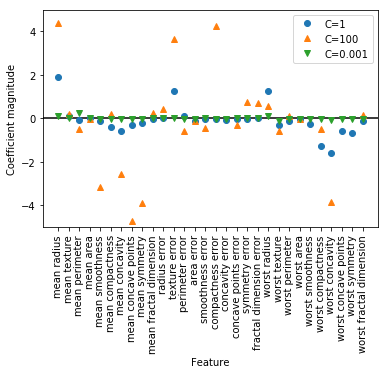

In [36]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

 로지스틱 회귀의 경우 기본적으로 L2규제이므로 릿지회귀와 비슷한 모습을 띈다.
 
 규제를 강하게 할 수록 계수들을 0에 더 가깝게 만들지만 완전한 0은 아니게 된다.
 
 계수들 (악성에 영향을 주거나, 아니면 악성/양성에 모두 다 영향을 주거나)을 유의깊게 봐야한다.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


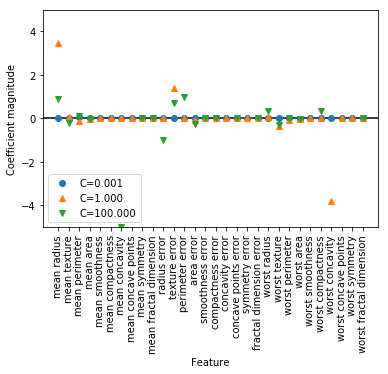

In [37]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델
- 로지스틱 회귀를 제외하고 선형분류 모델은 이진분류만을 지원함
- 확장하는 방법은 1대 다(one-vs, -rest)방법이 존재함
  - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 하습시킴
  - 클래스의 수 만큼 이진 분류모델이 만들어 짐
  - 모든 이진 분류기가 작동하여 가장 높은 점수가 나타나는 분류기 클래스를 예측값으로 선정함

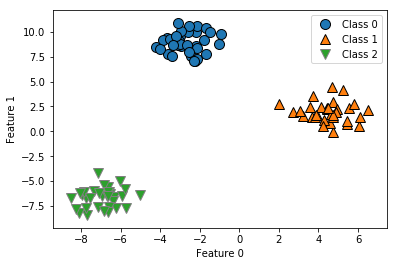

In [38]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [39]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


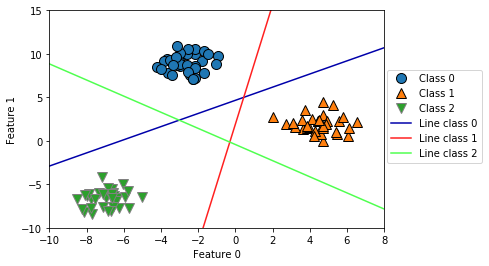

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))